# Summary statistics

## What is statistics?

Statistics is the field study that is concerned with data collection and its description in a useful way. 

Summary statistics are numbers that synthetically describe a data set. You can think of them as properties of data sets that allows us to understand and compare them with each other.

With statistics you can answer a lot of questions such as:

* How likely is that a customer will purchase this item?
* How many jean sizes do I need to manufacturate to cover the 95% of the population?

### Descriptive and inferential statistics

Descriptive statistics focuses on describing and summarizing the data at hand, and drawing highlights from it.

Inferential statistics is concerned with, given data from a sample, drawing inferences about a larger population.

### Data type classification

In statictics it is useful to classify the data as follows:

* Quantitative (numeric) data.
    * Continuous numeric data (measuraments).
    * Discrete numeric data (counted data).

* Qualiltative (categorical) data.
    * Nominal (without inherent order).
    * Ordinal (with inherent order). 

## Measures of center

Center summary statistics attempt to represent the entire data set in just one number: the "center" of data.

The three most popular center summary statistics are:

* Mean.
* Median. 
* Mode. 

The mode is the most frecuent value in a data set. It is useful when you are dealing with categorical data. 

### Mean and median

The mean $\bar{x}$ of a data set $x_i$ is definded as

$\displaystyle{\bar{x}=\frac{1}{n}\sum_{i=1}^{n}x_i}$.

The median is the middle value of the dataset, this means that 50% of the data is less than or equal to the median.

In [1]:
import pandas as pd 
import numpy as np 

food_consumption = pd.read_csv('/work/data_science_notes/25. Introduction to statistics in Python/data/food_consumption.csv', index_col=0)
food_consumption.head()

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96


In [2]:
# Create two DataFrames: one that holds the rows of food_consumption for 'Belgium' and another that holds rows for 'USA' 
# Call these be_consumption and usa_consumption
be_consumption = food_consumption[food_consumption.country == 'Belgium']
usa_consumption = food_consumption[food_consumption.country == 'USA']

# Calculate the mean and median of kilograms of food consumed per person per year for both countries
print(be_consumption.consumption.mean(), be_consumption.consumption.median())
print(usa_consumption.consumption.mean(), usa_consumption.consumption.median())

42.13272727272727 12.59
44.650000000000006 14.58


In [3]:
# Subset food_consumption for rows with data about Belgium and the USA
be_and_usa = food_consumption[(food_consumption.country == 'Belgium')|(food_consumption.country == 'USA')]

# Group the subsetted data by country and select only the consumption column
# Calculate the mean and median of the kilograms of food consumed per person per year in each country using .agg()
be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median])

,mean,median
country,,
Belgium,42.132727,12.59
USA,44.650000,14.58


### Mean vs. median

The mean is a very common and easy to compute summary statistic, but it has the disadvantage of being very sensitive to extreme values. It's the best option if you data has a symmetric distribution.

Since the median is derived from the ranking of sorted data, it's less affected by outliers. Therefore, it's the best option if the distribution of your data is skewed. 

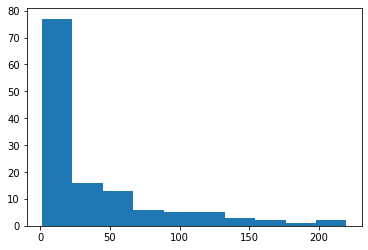

In [4]:
# Subset food_consumption to get the rows where food_category is 'rice'
rice_consumption = food_consumption[food_consumption.food_category == 'rice']

# Create a histogram of co2_emission for rice and show the plot
import matplotlib.pyplot as plt

plt.hist(rice_consumption.co2_emission)
plt.show()

In [5]:
# Use .agg() to calculate the mean and median of co2_emission for rice
rice_consumption.co2_emission.agg([np.mean, np.median])

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64

## Measures of spread

If we plot the distribution of a data set, the shape of the distribution and its spread give us an idea of how far from the measures of center (mean or median, for example)  we could expect to find the data. The most popular measures of spread are:

* Variance
* Standard deviation
* IQR

### Quartiles, quantiles, and quintiles

The $n-$th quantile of an ordered data set is the minimum value that is less than or equal to the $n$% of the data.   

Quantiles are a great way of summarizing numerical data since they can be used to measure center and spread, as well as to get a sense of where a data point stands in relation to the rest of the data set. 

If we calculate the 25th, 50th, and 75th quantiles of a data set, we can divide it into four intervals. In consecuence, those numbers are also known as the $Q_1$, $Q_2$ and $Q_3$ quartiles. 

The $IQR$ is a measure of spread calculated as the difference of the $Q_3$ and $Q_1$ quartiles. 

In [6]:
# Calculate the quartiles of the co2_emission column of food_consumption
np.quantile(food_consumption['co2_emission'], np.linspace(0,1,5))

array([   0.    ,    5.21  ,   16.53  ,   62.5975, 1712.    ])

In [7]:
# Calculate the six quantiles that split up the data into 5 pieces (quintiles) of the co2_emission column of food_consumption
np.quantile(food_consumption['co2_emission'], np.linspace(0,1,6))

array([   0.   ,    3.54 ,   11.026,   25.59 ,   99.978, 1712.   ])

In [8]:
# Calculate the eleven quantiles of co2_emission that split up the data into ten pieces (deciles)
np.quantile(food_consumption['co2_emission'], np.linspace(0,1,11))

array([0.00000e+00, 6.68000e-01, 3.54000e+00, 7.04000e+00, 1.10260e+01,
       1.65300e+01, 2.55900e+01, 4.42710e+01, 9.99780e+01, 2.03629e+02,
       1.71200e+03])

### Variance and standard deviation

The variance of a data set $x_{i}$, containing data from a full population, is defined as:

$\displaystyle{s^{2} = \frac{1}{n}\sum_{i=1}^{n}{(x_{i} - \bar{x})^{2}}}$.

And the variance for a sample of the data set is given by:

$\displaystyle{s^{2} = \frac{1}{n-1}\sum_{i=1}^{n}{(x_{i} - \bar{x})^{2}}}$.

The standard deviation is the square root of the variance: 

$\displaystyle{\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^{n}{(x_{i} - \bar{x})^{2}}}}$.

And the standard deviation of a sample is:

$\displaystyle{\sigma = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}{(x_{i} - \bar{x})^{2}}}}$.



In [9]:
# Calculate the variance and standard deviation of co2_emission for each food_category by grouping and aggregating
co2_emission_by_category = food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std])
co2_emission_by_category

,var,std
food_category,,
beef,88748.408132,297.906710
dairy,17671.891985,132.935669
eggs,21.371819,4.622966
fish,921.637349,30.358481
lamb_goat,16475.518363,128.356996
nuts,35.639652,5.969895
pork,3094.963537,55.632396
poultry,245.026801,15.653332
rice,2281.376243,47.763754


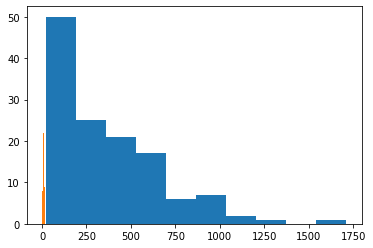

In [10]:
# Create a histogram of co2_emission for the beef food_category and show the plot
plt.hist(food_consumption[food_consumption.food_category == 'beef']['co2_emission'])

# Create a histogram of co2_emission for the eggs food_category and show the plot
plt.hist(food_consumption[food_consumption.food_category == 'eggs']['co2_emission'])
plt.show()

### Finding outliers using IQR

Outliers are values that are considered as anomalous in a data set. What is considered abnormal depends on the context of the data, but a usual definition for outliers is: 

$\displaystyle{a ; a \not\in [Q_1 - 1.5*IQR, Q_3 + 1.5*IQR]}$.

In [11]:
# Calculate the total co2_emission per country by grouping by country and taking the sum of co2_emission
# Store the resulting DataFrame as emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quartiles of emissions_by_country and store these as q1 and q3
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)

# Calculate the interquartile range of emissions_by_country and store it as iqr
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers of emissions_by_country, and store these as lower and upper
lower = q1 - iqr*1.5
upper = q3 + iqr*1.5

# Subset emissions_by_country to get countries with a total emission greater than the upper cutoff or a total emission less than the lower cutoff
emissions_by_country[(emissions_by_country <= lower)|(emissions_by_country >= upper)]

country
Argentina    2172.4
Name: co2_emission, dtype: float64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a1dd5a00-3cfe-442e-b8d4-76a3901102ce' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>